# OSMnx Basics
## Gotchas
By default, OSMnx will cache queries to disk to speed up subsequent queries. Sometimes this fails to fetch the proper graph. Just delete the cache to fix.
By default, OSMnx will not fetch all key:value pairs. To fix it you can use the `custom_filter` parameter. 
    OR you can set the config ox.settings.useful_tags_way += ['key'] to include the key in the query.

In [1]:
import osmnx as ox
import pyproj # we need this for jupyter-book to build right...

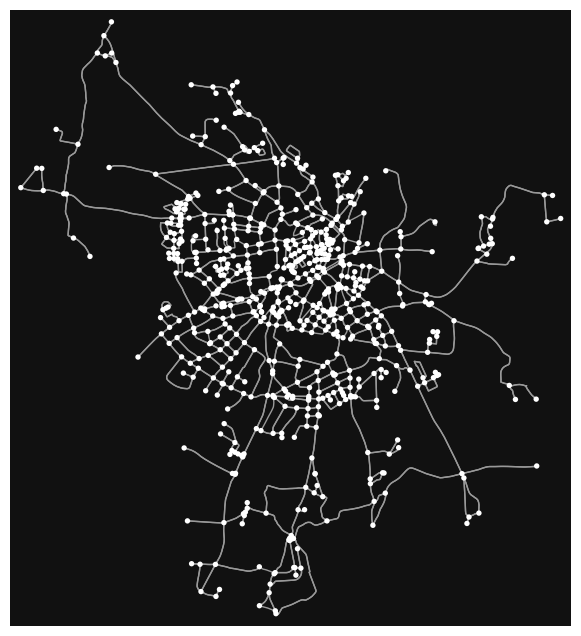

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [3]:
# get the street network for Freiberg, Sachsen
G = ox.graph_from_place('Freiberg, Sachsen, Germany', network_type='drive')
G_projected = ox.project_graph(G)
ox.plot_graph(G_projected)

In [4]:
ox.plot_graph_folium(G)

C:\Users\plank\AppData\Local\Temp\ipykernel_8\607548164.py:1: FutureWarning: The `folium` module has been deprecated and will be removed in the v2.0.0 release. You can generate and explore interactive web maps of graph nodes, edges, and/or routes automatically using GeoPandas.GeoDataFrame.explore instead, for example like: `ox.graph_to_gdfs(G, nodes=False).explore()`. See the OSMnx examples gallery for complete details and demonstrations.
  ox.plot_graph_folium(G)


In [5]:
nodes, edges = ox.graph_to_gdfs(G)
edges.explore()

In [6]:
import folium
import xyzservices
# Making a Map with custom tiles
# http://{s}.yourtiles.com/{z}/{x}/{y}.png
providerInfo = {
    "name": "Watercolor Map",
    "url": "https://watercolormaps.collection.cooperhewitt.org/tile/watercolor/{z}/{x}/{y}.jpg",
    "max_zoom": 19,
    "attribution": "Map tiles by Stamen Design, under CC BY 3.0. Data by OpenStreetMap, under CC BY SA."
}

TileProvider = xyzservices.TileProvider(providerInfo)

m = folium.Map(location=(50.915066, 13.346332),
               zoom_start=15, tiles=TileProvider)
edges.explore(m=m)

In [7]:
x = """
Global settings that can be configured by the user.

all_oneway : bool
    Only use if specifically saving to .osm XML file with the `save_graph_xml`
    function. If True, forces all ways to be loaded as oneway ways, preserving
    the original order of nodes stored in the OSM way XML. This also retains
    original OSM string values for oneway attribute values, rather than
    converting them to a True/False bool. Default is `False`.
bidirectional_network_types : list
    Network types for which a fully bidirectional graph will be created.
    Default is `["walk"]`.
cache_folder : string or pathlib.Path
    Path to folder in which to save/load HTTP response cache, if the
    `use_cache` setting equals `True`. Default is `"./cache"`.
cache_only_mode : bool
    If True, download network data from Overpass then raise a
    `CacheOnlyModeInterrupt` error for user to catch. This prevents graph
    building from taking place and instead just saves OSM response data to
    cache. Useful for sequentially caching lots of raw data (as you can
    only query Overpass one request at a time) then using the local cache to
    quickly build many graphs simultaneously with multiprocessing. Default is
    `False`.
data_folder : string or pathlib.Path
    Path to folder in which to save/load graph files by default. Default is
    `"./data"`.
default_accept_language : string
    HTTP header accept-language. Default is `"en"`.
default_access : string
    Default filter for OSM "access" key. Default is `'["access"!~"private"]'`.
    Note that also filtering out "access=no" ways prevents including
    transit-only bridges (e.g., Tilikum Crossing) from appearing in drivable
    road network (e.g., `'["access"!~"private|no"]'`). However, some drivable
    tollroads have "access=no" plus a "access:conditional" key to clarify when
    it is accessible, so we can't filter out all "access=no" ways by default.
    Best to be permissive here then remove complicated combinations of tags
    programatically after the full graph is downloaded and constructed.
default_crs : string
    Default coordinate reference system to set when creating graphs. Default
    is `"epsg:4326"`.
default_referer : string
    HTTP header referer. Default is
    `"OSMnx Python package (https://github.com/gboeing/osmnx)"`.
default_user_agent : string
    HTTP header user-agent. Default is
    `"OSMnx Python package (https://github.com/gboeing/osmnx)"`.
doh_url_template : string
    Endpoint to resolve DNS-over-HTTPS if local DNS resolution fails. Set to
    None to disable DoH, but see `downloader._config_dns` documentation for
    caveats. Default is: `"https://8.8.8.8/resolve?name={hostname}"`
elevation_url_template : string
    Endpoint of the Google Maps Elevation API (or equivalent), containing
    exactly two parameters: `locations` and `key`. Default is:
    `"https://maps.googleapis.com/maps/api/elevation/json?locations={locations}&key={key}"`
    One example of an alternative equivalent would be Open Topo Data:
    `"https://api.opentopodata.org/v1/aster30m?locations={locations}&key={key}"`
imgs_folder : string or pathlib.Path
    Path to folder in which to save plotted images by default. Default is
    `"./images"`.
log_file : bool
    If True, save log output to a file in logs_folder. Default is `False`.
log_filename : string
    Name of the log file, without file extension. Default is `"osmnx"`.
log_console : bool
    If True, print log output to the console (terminal window). Default is
    `False`.
log_level : int
    One of Python's logger.level constants. Default is `logging.INFO`.
log_name : string
    Name of the logger. Default is `"OSMnx"`.
logs_folder : string or pathlib.Path
    Path to folder in which to save log files. Default is `"./logs"`.
max_query_area_size : int
    Maximum area for any part of the geometry in meters: any polygon bigger
    than this will get divided up for multiple queries to the API. Default is
    `2500000000`.
memory : int
    Overpass server memory allocation size for the query, in bytes. If
    None, server will use its default allocation size. Use with caution.
    Default is `None`.
nominatim_endpoint : string
    The base API url to use for Nominatim queries. Default is
    `"https://nominatim.openstreetmap.org/"`.
nominatim_key : string
    Your Nominatim API key, if you are using an API instance that requires
    one. Default is `None`.
osm_xml_node_attrs : list
    Node attributes for saving .osm XML files with `save_graph_xml` function.
    Default is `["id", "timestamp", "uid", "user", "version", "changeset",
    "lat", "lon"]`.
osm_xml_node_tags : list
    Node tags for saving .osm XML files with `save_graph_xml` function.
    Default is `["highway"]`.
osm_xml_way_attrs : list
    Edge attributes for saving .osm XML files with `save_graph_xml` function.
    Default is `["id", "timestamp", "uid", "user", "version", "changeset"]`.
osm_xml_way_tags : list
    Edge tags for for saving .osm XML files with `save_graph_xml` function.
    Default is `["highway", "lanes", "maxspeed", "name", "oneway"]`.
overpass_endpoint : string
    The base API url to use for Overpass queries. Default is
    `"https://overpass-api.de/api"`.
overpass_rate_limit : bool
    If True, check the Overpass server status endpoint for how long to
    pause before making request. Necessary if server uses slot management,
    but can be set to False if you are running your own overpass instance
    without rate limiting. Default is `True`.
overpass_settings : string
    Settings string for Overpass queries. Default is
    `"[out:json][timeout:{timeout}]{maxsize}"`. By default, the {timeout} and
    {maxsize} values are set dynamically by OSMnx when used.
    To query, for example, historical OSM data as of a certain date:
    `'[out:json][timeout:90][date:"2019-10-28T19:20:00Z"]'`. Use with caution.
requests_kwargs : dict
    Optional keyword args to pass to the requests package when connecting
    to APIs, for example to configure authentication or provide a path to
    a local certificate file. More info on options such as auth, cert,
    verify, and proxies can be found in the requests package advanced docs.
    Default is `{}`.
timeout : int
    The timeout interval in seconds for HTTP requests, and (when applicable)
    for API to use while running the query. Default is `180`.
use_cache : bool
    If True, cache HTTP responses locally instead of calling API repeatedly
    for the same request. Default is `True`.
useful_tags_node : list
    OSM "node" tags to add as graph node attributes, when present in the data
    retrieved from OSM. Default is `["ref", "highway"]`.
useful_tags_way : list
    OSM "way" tags to add as graph edge attributes, when present in the data
    retrieved from OSM. Default is `["bridge", "tunnel", "oneway", "lanes",
    "ref", "name", "highway", "maxspeed", "service", "access", "area",
    "landuse", "width", "est_width", "junction"]`.
"""
print()